**EE-411 Homework 3 : Neural Networks**

*Name : Palmisano*

*First Name : Fabio Nicola Edouard*

*Sciper = 296708*


## **Part 1 : Backpropagation with logistic loss**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=RuntimeWarning)

## 1.1) Function Predict:

In [3]:
# X : Array of shape B X D, W = {w_1 : D x K, w_2 : K x 1}

#Directly taken from the TP9

def np_sigmoid(t):
    """apply sigmoid function on t."""
    return 1.0 / (1 + np.exp(-t))

def predict(X,W) :
    x_0 = X
    z_1 = np.dot(X,W["w_1"])
    X_1 = np_sigmoid(z_1)
    z_2 = np.dot(X_1,W["w_2"])
    y_hat = np_sigmoid(z_2)
    return (z_1, z_2, y_hat)




In [4]:
D = 7
K = 5
B = 100

X = np.random.rand(B, D)
W = {"w_1": np.random.rand(D, K), "w_2": np.random.rand(K, 1)}

z_1, z_2, y_hat = predict(X, W)
print(z_1.shape)
print(z_2.shape)
print(y_hat.shape)


(100, 5)
(100, 1)
(100, 1)


## 1.2) Function Logistic Loss:

In [5]:
import numpy as np

def logistic_loss(y, y_hat):
    """Compute the average logistic loss of a batch."""
    avg_log_loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    return avg_log_loss

In [6]:
y_hat = np.zeros((B, 1))
y = np.zeros((B, 1))
loss = logistic_loss(y, y_hat)
print(f"loss = {loss}")

loss = nan


It equal to zero because we can't calcul the logarithm of zero so that give us the Nan result.

## 1.3) Function  stable logistic loss:

So we start form the equation of the loss :
$\begin{equation}
\mathcal{L} (y, \hat{y}) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y}) \ \ \ with \ \ \ \hat{y} = \frac{1}{1+e^{-z_2}}
\end{equation}$
The we replace $\hat{y}$ in this equation by his value and we obtain
$\begin{equation}
y \log(1+e^{-z_2}) - (1 - y) \log(1 - \frac{1}{1+e^{-z_2}}) = y \log(1+e^{-z_2}) - (1 - y) \log(\frac{e^{-z_2}}{1+e^{-z_2}}) =  y \log(1+e^{-z_2}) + (1 - y)*z_2 + (1-y)\log(1+e^{-z_2})
\end{equation}$
Looking at the Documentation we know that $ logaddexp (a,b)= \log(e^{a} + e^{b})$ we have :
$\begin{equation}
\log(1+e^{-z_2}) + (1 - y)*z_2  = logaddexp(0,-z_2) + (1-y)*z_2
\end{equation}$

In [7]:
import numpy as np

def stable_logistic_loss(y, z2):
    """Compute the average stable logistic loss of a batch."""
    avg_loss = np.mean(np.logaddexp(0, -z2) + (1-y) * z2)
    return avg_loss

z2 = -10e10 * np.ones(B)
y = np.zeros((B, 1))
stable_loss = stable_logistic_loss(y, z2)
print(f"stable_loss = {stable_loss:.3f}")

stable_loss = 0.000


So we have a stable implementation of our logistic loss.

## 1.4) Derive Analytically (Notebook)

$\begin{equation}
\dfrac{\partial \mathcal{L}}{\partial w^{(1)}_{i,j}}=\dfrac{\partial \mathcal{L}}{\partial z^{(2)}_{i}} \cdot \dfrac{\partial z^{(2)}_{i}}{\partial z^{(1)}_{i}} \cdot \dfrac{\partial z^{(1)}_{i}}{\partial w^{(1)}_{i,j}} \ \ \ and \ \ \          \dfrac{\partial \mathcal{L}}{\partial w^{(2)}_{i}}=\dfrac{\partial \mathcal{L}}{\partial z^{(1)}_{i}} \cdot \dfrac{\partial z^{(2)}_{i}}{\partial w^{(2)}_{i}}
\end{equation}$
Developping what we obtain above we add :
$\begin{equation}
\dfrac{\partial \mathcal{L}}{\partial z^{(2)}_{i}} = (1 - y) - \frac{e^{-z_i^{2}}}{1+e^{-z_i^{2}}} = (1-y) - ( 1 - \sigma(z_i^{2})) = (1-y) - ( 1 - \hat{y}) =  \hat{y} - y
\end{equation}$

$\begin{equation}
\dfrac{\partial z^{(2)}_{i}}{\partial z^{(1)}_{i}} = \dfrac{\partial(w^{(2)} x^{(1)})}{\partial z^{(1)}_{i}} = w^{(2)} \sigma(z_i^{(1)}) (1 - \sigma(z_i^{(1)}))
\end{equation}$


$\begin{equation}
\dfrac{\partial z^{(1)}_{i}}{\partial w^{(1)}_{i,j}} = x^{(0)} \ \ \ and \ \ \ \dfrac{\partial z^{(2)}_{i}}{\partial w^{(2)}_{i}} = x^{(1)} = \sigma(z_i^{(1)})
\end{equation}$

And we finally obtain this result :

$\begin{equation}
\dfrac{\partial \mathcal{L}}{\partial w^{(1)}_{i,j}} = (\hat{y} - y) \cdot w^{(2)} \cdot \sigma(z_i^{(1)}) (1 - \sigma(z_i^{(1)})) \cdot  x^{(0)}  \ \ \ and \ \ \ \dfrac{\partial \mathcal{L}}{\partial w^{(2)}_{i}}= (\hat{y} - y)\cdot \sigma(z_i^{(1)})
\end{equation}$


## 1.5) Implement Gradient

In [8]:
def gradient(X, y, W):
    """Compute the gradient of the average loss with respect to all the weights."""
    z_1, z_2, y_hat = predict(X, W)
    print(y_hat.shape)
    print(z_1.shape)
    print(z_2.shape)
    dLdz2 = y_hat - y
    dLdw2 = np.dot(np_sigmoid(z_1).T, dLdz2)
    dz2dz1 = W["w_2"].T * np_sigmoid(z_1) * (1 - np_sigmoid(z_1))
    dLdw1 = np.dot(X.T, dLdz2 * dz2dz1)
    return (dLdw1, dLdw2)


In [9]:
D = 7
K = 5
B = 100

X = np.random.rand(B, D)-0.5
W = {
    "w_1": np.random.rand(D, K)-0.5,
    "w_2": np.random.rand(K, 1)-0.5
}

g_w1, g_w2 = gradient(X, y, W)
print(g_w1.shape)
print(g_w2.shape)


(100, 1)
(100, 5)
(100, 1)
(7, 5)
(5, 1)


## **Part 2 : Classifying KMNIST using neural networks**

In [10]:
# first we load all the necessary libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F

In [11]:
BATCH_SIZE = 1024
TEST_BATCH_SIZE = 2048
LEARNING_RATE = 0.01
EPOCHS = 20


In [12]:
# find out which device is available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [13]:
transform = T.Compose([T.ToTensor()])

# load the train dataset
train_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

# load the test dataset
test_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

# Create the validation dataset from the train dataset
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

100%|██████████| 18165135/18165135 [00:16<00:00, 1076429.25it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 133490.63it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 977517.35it/s] 


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 22700672.81it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [14]:
# construct the dataloader for the traininig dataset.
# Here we shuffle the data to promote stochasticity.
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2)


# Construct the dataloader for the testing dataset.
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

validation_dataloader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)


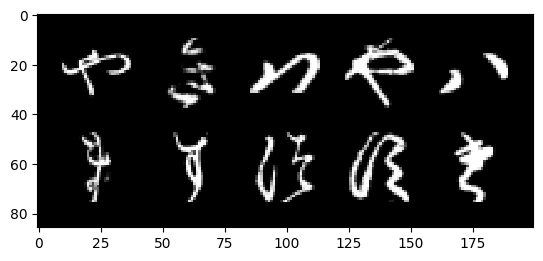

In [15]:
# Get the first 10 images of the train dataset. Hint: use next(), iter()
images = next(iter(train_dataloader))[0][:10]
grid = torchvision.utils.make_grid(images, nrow=5, padding=10)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

show(grid)

### ANSWER THE Q

## 2.2) MLP

In [16]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        output = self.fc3(x)
        return output


In [17]:
accuracies = []
models = []
losses = []
def train_epoch(
    model: nn.Module,
    train_dataloader: DataLoader,
    optimizer: torch.optim.Optimizer,
    device: torch.device
    ):
    '''
    This function implements the core components of any Neural Network training regiment.
    In our stochastic setting our code follows a very specific "path". First, we load the batch
    a single batch and zero the optimizer. Then we perform the forward pass, compute the gradients and perform the backward pass. And ...repeat!
    '''
    running_loss = 0.0
    model = model.to(device)
    model.train()
    for batch_idx, (data, target) in enumerate(train_dataloader):
        # move data and target to device
        data, target = data.to(device), target.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # do the forward pass
        output = model(data)

        # compute the loss
        loss = F.cross_entropy(output, target)

        # compute the gradients
        loss.backward()


        # perform the gradient step
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    return running_loss / len(train_dataloader.dataset)


from typing import Optional

def fit(
    model: nn.Module,
    train_dataloader: DataLoader,
    optimizer: torch.optim.Optimizer,
    epochs: int,
    device: torch.device,
    valid_dataloader: Optional[DataLoader]=None):
    '''
    the fit method simply calls the train_epoch() method for a
    specified number of epochs.
    '''

    # keep track of the losses in order to visualize them later
    # Train for numerous epochs:
    train_losses = []
    valid_losses = []
    valid_accs = []
    for epoch in range(epochs):
        train_loss = train_epoch(
            model=model,
            train_dataloader=train_dataloader,
            optimizer=optimizer,
            device=device
        )
        train_losses.append(train_loss)

        if valid_dataloader is not None:
            valid_loss, valid_acc = predict(model, valid_dataloader, device, verbose=False)
            valid_losses.append(valid_loss)
            valid_accs.append(valid_acc)

        if valid_dataloader is None:
            print(f"Epoch {epoch}: Train Loss={train_loss:.4f}")
        else:
            print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Validation Loss={valid_loss:.4f}, Validation acc={valid_acc:.4f}")

    return train_losses, valid_losses, valid_accs

def predict(
    model: nn.Module, test_dataloader: DataLoader, device: torch.device, verbose=True
):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target, reduction="sum")
            test_loss += loss.item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(test_dataloader.dataset)
    accuracy = 100.0 * correct / len(test_dataloader.dataset)

    if verbose:
        print(
            f"Test set: Avg. loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_dataloader.dataset)} ({accuracy:.0f}%)"
        )
        accuracies.append(accuracy)
    return test_loss, accuracy

def visualize_images(dataloader):
    images = next(iter(dataloader))[0][:10]
    grid = torchvision.utils.make_grid(images, nrow=5, padding=10)

    def show(img):
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation="nearest")

    show(grid)


def plot_loss(losses, ylim=None):
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.ylim(ylim)
    plt.title("Loss progression across epochs")

SGD with LR = 0.01
Epoch 0: Train Loss=0.0023, Validation Loss=2.2921, Validation acc=11.3800
Epoch 1: Train Loss=0.0022, Validation Loss=2.2775, Validation acc=16.5100
Epoch 2: Train Loss=0.0022, Validation Loss=2.2585, Validation acc=25.3800
Epoch 3: Train Loss=0.0022, Validation Loss=2.2324, Validation acc=32.7800
Epoch 4: Train Loss=0.0022, Validation Loss=2.1968, Validation acc=35.4600
Epoch 5: Train Loss=0.0021, Validation Loss=2.1486, Validation acc=35.8600
Epoch 6: Train Loss=0.0021, Validation Loss=2.0867, Validation acc=36.4400
Epoch 7: Train Loss=0.0020, Validation Loss=2.0129, Validation acc=38.6400
Epoch 8: Train Loss=0.0019, Validation Loss=1.9326, Validation acc=42.4800
Epoch 9: Train Loss=0.0018, Validation Loss=1.8513, Validation acc=47.6700
Epoch 10: Train Loss=0.0018, Validation Loss=1.7712, Validation acc=53.5900
Epoch 11: Train Loss=0.0017, Validation Loss=1.6920, Validation acc=58.2100
Epoch 12: Train Loss=0.0016, Validation Loss=1.6126, Validation acc=61.1100
Epo

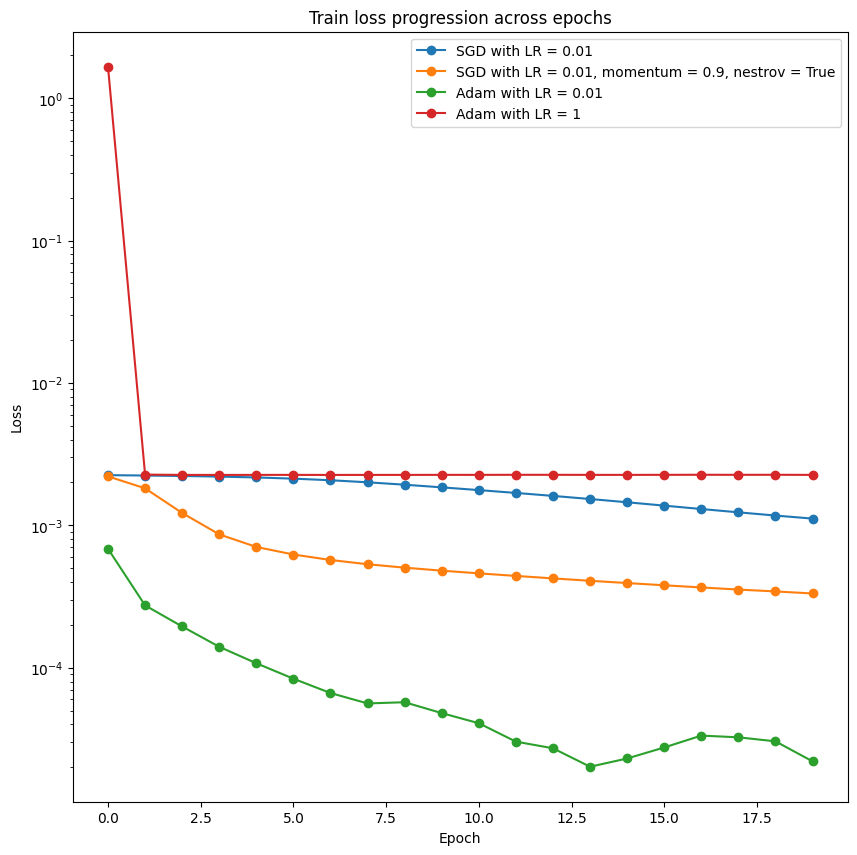

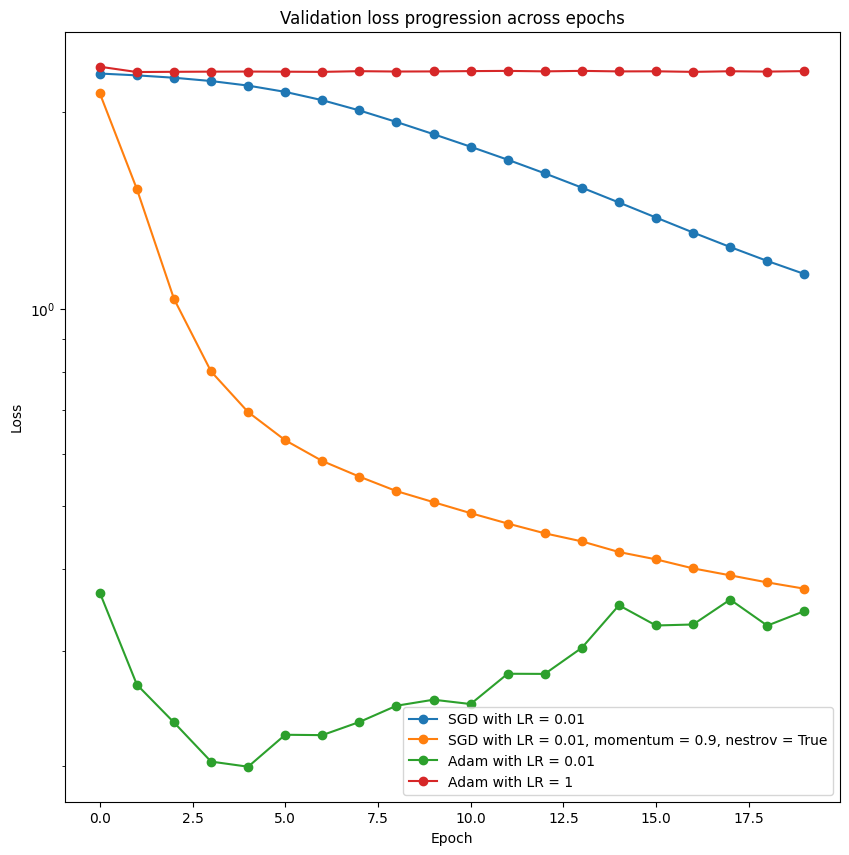

In [18]:

#Model with Optimizer : SGD and Learning Rate : 0.01
modelSGD_001 = MLP()
optimizerSGD_001 = optim.SGD(modelSGD_001.parameters(), lr=0.01)
models.append('SGD with LR = 0.01')
print('SGD with LR = 0.01')
train_lossesSGD_001, valid_lossesSGD_001, valid_accsSGD_001 = fit(modelSGD_001, train_dataloader,  optimizerSGD_001, EPOCHS, device = DEVICE,valid_dataloader= validation_dataloader)
predict(modelSGD_001, test_dataloader, device = DEVICE)


#Model with Optimizer : SGD with momentum and Learning Rate : 0.01, momentum : 0.9, nestrov : True
modelSGD_001_momentum = MLP()
optimizerSGD_001_momentum = optim.SGD(modelSGD_001_momentum.parameters(), lr=0.01, momentum=0.9, nesterov=True)
models.append('SGD with Momentum')
print('SGD with LR = 0.01, momentum = 0.9, nestrov = True')
train_lossesSGD_001_momentum, valid_lossesSGD_001_momentum, valid_accsSGD_001_momentum = fit(modelSGD_001_momentum, train_dataloader, optimizerSGD_001_momentum, EPOCHS, device = DEVICE,valid_dataloader=validation_dataloader)
predict(modelSGD_001_momentum, test_dataloader, device = DEVICE)


#Model with Adam Optimizer and Learning Rate : 0.01
modelAdam_001 = MLP()
optimizerAdam_001 = optim.Adam(modelAdam_001.parameters(), lr=0.01)
models.append('Adam with LR = 0.01')
print('Adam with LR = 0.01')
train_lossesAdam_001, valid_lossesAdam_001, valid_accsAdam_001 = fit(modelAdam_001, train_dataloader, optimizerAdam_001, EPOCHS, device = DEVICE,valid_dataloader=validation_dataloader)
predict(modelAdam_001, test_dataloader, device = DEVICE)

#Model with Adam Optimizer and Learning Rate : 1
modelAdam_1 = MLP()
optimizerAdam_1 = optim.Adam(modelAdam_1.parameters(), lr=1)
models.append('Adam with LR = 1')
print('Adam with LR = 1')
train_lossesAdam_1, valid_lossesAdam_1, valid_accsAdam_1 = fit(modelAdam_1, train_dataloader, optimizerAdam_1, EPOCHS, device = DEVICE,valid_dataloader=validation_dataloader)
predict(modelAdam_1, test_dataloader, device = DEVICE)


plt.figure(figsize=(10, 10))
plt.plot(train_lossesSGD_001, label = "SGD with LR = 0.01", marker = 'o')
plt.plot(train_lossesSGD_001_momentum, label = "SGD with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(train_lossesAdam_001, label = "Adam with LR = 0.01", marker = 'o')
plt.plot(train_lossesAdam_1,  label = "Adam with LR = 1", marker = 'o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Train loss progression across epochs")
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(valid_lossesSGD_001, label = "SGD with LR = 0.01", marker = 'o')
plt.plot(valid_lossesSGD_001_momentum, label = "SGD with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(valid_lossesAdam_001, label = "Adam with LR = 0.01", marker = 'o')
plt.plot(valid_lossesAdam_1,  label = "Adam with LR = 1", marker = 'o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Validation loss progression across epochs")
plt.show()

In [19]:
print('Validation Accuracy with SGD with LR = 0.01')
loss_SGD001, accuracy_SGD001 = predict(modelSGD_001, test_dataloader, device = DEVICE)
models.append('modelSGD_001')
losses.append(loss_SGD001)
print('----------------------------------------------------------------------')
print('Validation Accuracy with SGD with LR = 0.01, momentum = 0.9, nestrov = True')
loss_SGDMom,accuracy_SGDMom =predict(modelSGD_001_momentum, test_dataloader, device = DEVICE)
models.append('modelSGD_001_momentum')
losses.append(loss_SGDMom)
print('----------------------------------------------------------------------')
print('Validation Accuracy with Adam with LR = 0.01')
loss_Adam001, accuracy_Adam001 = predict(modelAdam_001, test_dataloader, device = DEVICE)
models.append('modelAdam_001')
losses.append(loss_Adam001)
print('----------------------------------------------------------------------')
print('Validation Accuracy with Adam with LR = 1')
loss_Adam1, accuracy_Adam1 = predict(modelAdam_1, test_dataloader, device = DEVICE)
models.append('modelAdam_1')
losses.append(loss_Adam1)


Validation Accuracy with SGD with LR = 0.01
Test set: Avg. loss: 1.5199, Accuracy: 5398/10000 (54%)
----------------------------------------------------------------------
Validation Accuracy with SGD with LR = 0.01, momentum = 0.9, nestrov = True
Test set: Avg. loss: 0.6953, Accuracy: 7850/10000 (78%)
----------------------------------------------------------------------
Validation Accuracy with Adam with LR = 0.01
Test set: Avg. loss: 0.8263, Accuracy: 8861/10000 (89%)
----------------------------------------------------------------------
Validation Accuracy with Adam with LR = 1
Test set: Avg. loss: 2.3114, Accuracy: 1000/10000 (10%)


We can directly see that the model with SGD with momentum have a higher Accuracy score. However we can do better taking the optimizer Adam but with a learning rate not too big.

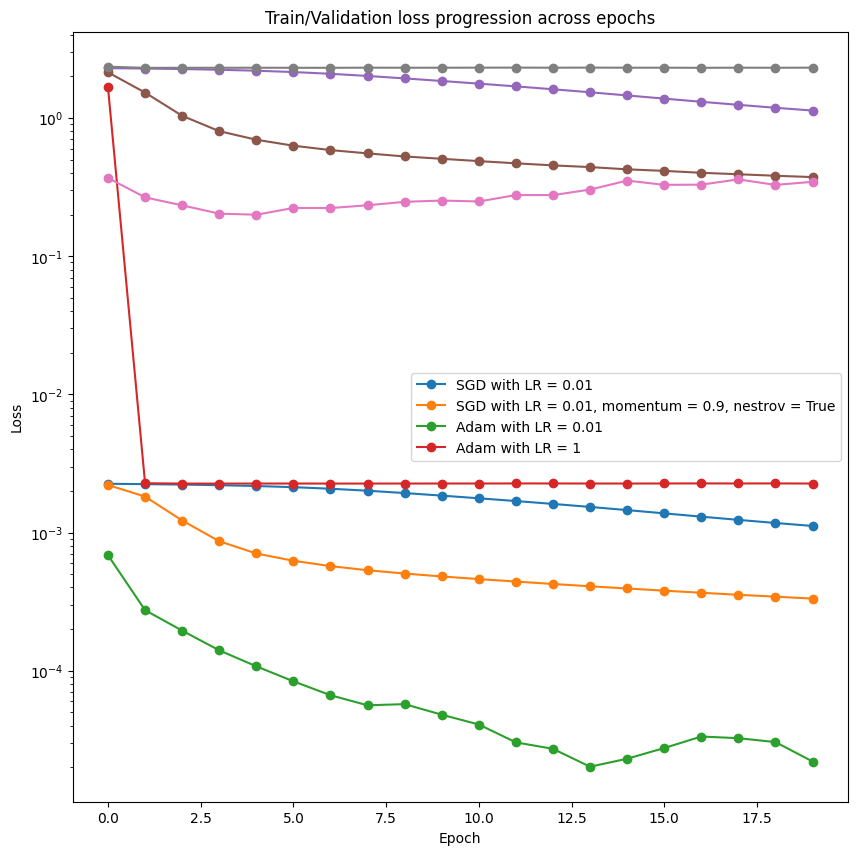

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(train_lossesSGD_001, label = "SGD with LR = 0.01", marker = 'o')
plt.plot(train_lossesSGD_001_momentum, label = "SGD with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(train_lossesAdam_001, label = "Adam with LR = 0.01", marker = 'o')
plt.plot(train_lossesAdam_1,  label = "Adam with LR = 1", marker = 'o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Train/Validation loss progression across epochs")
plt.plot(valid_lossesSGD_001, label = "SGD with LR = 0.01", marker = 'o')
plt.plot(valid_lossesSGD_001_momentum, label = "SGD with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(valid_lossesAdam_001, label = "Adam with LR = 0.01", marker = 'o')
plt.plot(valid_lossesAdam_1,  label = "Adam with LR = 1", marker = 'o')
plt.show()

## 2.3) Same but with CNN

In [21]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


SGD in CNN with LR = 0.01
Epoch 0: Train Loss=0.0023, Validation Loss=2.3031, Validation acc=10.0300
Epoch 1: Train Loss=0.0023, Validation Loss=2.3005, Validation acc=10.2600
Epoch 2: Train Loss=0.0023, Validation Loss=2.2981, Validation acc=10.9200
Epoch 3: Train Loss=0.0023, Validation Loss=2.2955, Validation acc=12.1500
Epoch 4: Train Loss=0.0022, Validation Loss=2.2926, Validation acc=13.9400
Epoch 5: Train Loss=0.0022, Validation Loss=2.2894, Validation acc=16.9500
Epoch 6: Train Loss=0.0022, Validation Loss=2.2854, Validation acc=21.0200
Epoch 7: Train Loss=0.0022, Validation Loss=2.2804, Validation acc=23.8600
Epoch 8: Train Loss=0.0022, Validation Loss=2.2745, Validation acc=27.0300
Epoch 9: Train Loss=0.0022, Validation Loss=2.2669, Validation acc=28.1300
Epoch 10: Train Loss=0.0022, Validation Loss=2.2568, Validation acc=28.2300
Epoch 11: Train Loss=0.0022, Validation Loss=2.2430, Validation acc=29.9200
Epoch 12: Train Loss=0.0022, Validation Loss=2.2236, Validation acc=32.5

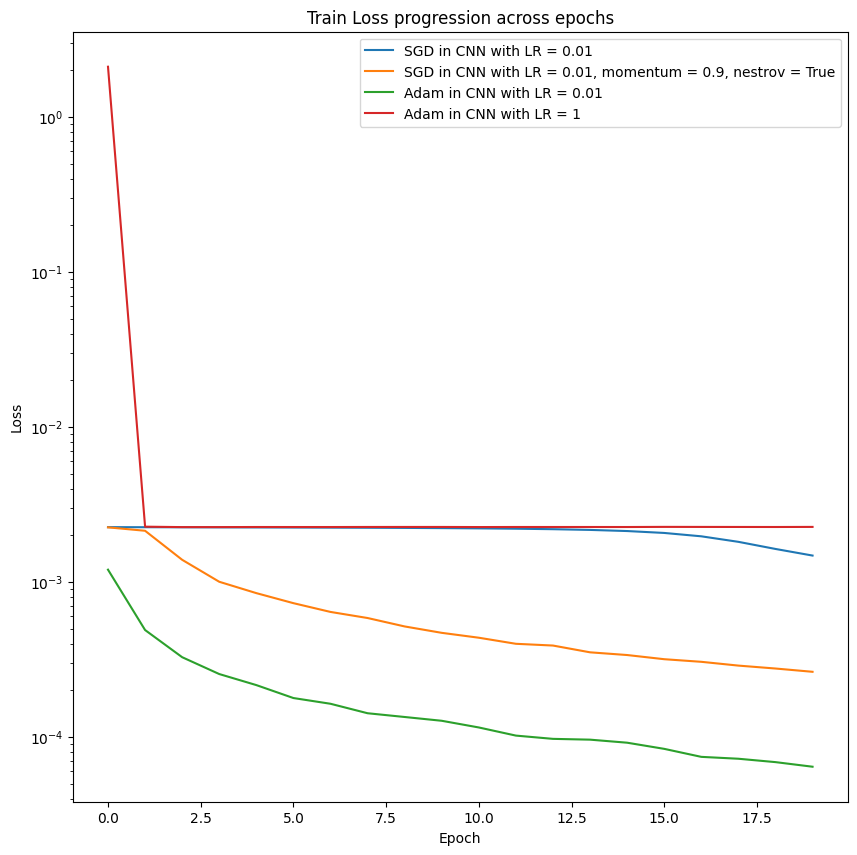

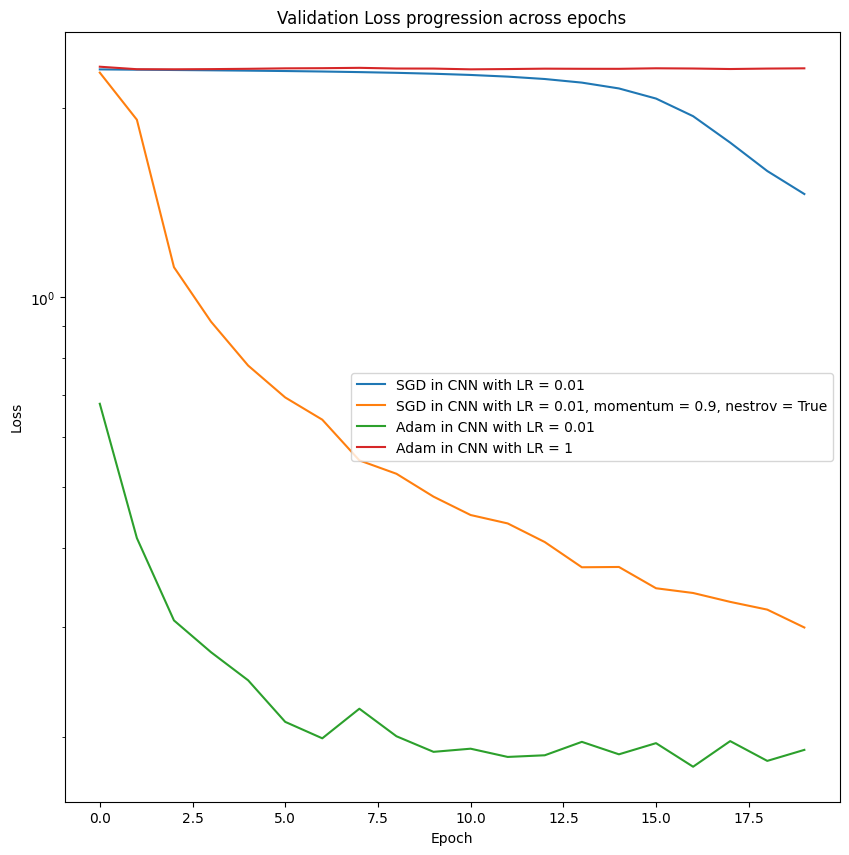

In [22]:
#Model with Optimizer : SGD and Learning Rate : 0.01
modelSGD_001_CNN = CNN()
optimizerSGD_001_CNN = optim.SGD(modelSGD_001_CNN.parameters(), lr=0.01)
print('SGD in CNN with LR = 0.01')
train_lossesSGD_001_CNN, valid_lossesSGD_001_CNN, valid_accsSGD_001_CNN = fit(modelSGD_001_CNN, train_dataloader, optimizerSGD_001_CNN, EPOCHS, device = DEVICE, valid_dataloader=validation_dataloader)
predict(modelSGD_001_CNN, test_dataloader, device = DEVICE)


#Model with Optimizer : SGD with momentum and Learning Rate : 0.01, momentum : 0.9, nestrov : True
modelSGD_001_momentum_CNN = CNN()
optimizerSGD_001_momentum_CNN = optim.SGD(modelSGD_001_momentum_CNN.parameters(), lr=0.01, momentum=0.9, nesterov=True)
print('SGD in CNN with LR = 0.01, momentum = 0.9, nestrov = True')
train_lossesSGD_001_momentum_CNN, valid_lossesSGD_001_momentum_CNN, valid_accsSGD_001_momentum_CNN = fit(modelSGD_001_momentum_CNN, train_dataloader, optimizerSGD_001_momentum_CNN, EPOCHS, device = DEVICE, valid_dataloader=validation_dataloader)
predict(modelSGD_001_momentum_CNN, test_dataloader, device = DEVICE)


#Model with Adam Optimizer and Learning Rate : 0.01
modelAdam_001_CNN = CNN()
optimizerAdam_001_CNN = optim.Adam(modelAdam_001_CNN.parameters(), lr=0.01)
print('Adam in CNN with LR = 0.01')
train_losses_adam001_CNN, valid_losses_adam001_CNN, valid_accs_adam001_CNN = fit(modelAdam_001_CNN, train_dataloader, optimizerAdam_001_CNN, EPOCHS, device = DEVICE,valid_dataloader=validation_dataloader)
predict(modelAdam_001_CNN, test_dataloader, device = DEVICE)


#Model with Adam Optimizer and Learning Rate : 1
modelAdam_1_CNN = CNN()
optimizerAdam_1_CNN = optim.Adam(modelAdam_1_CNN.parameters(), lr=1)
print('Adam in CNN with LR = 1')
train_lossesAdam_1_CNN, valid_lossesAdam_1_CNN, valid_accsAdam_1_CNN = fit(modelAdam_1_CNN, train_dataloader, optimizerAdam_1_CNN, EPOCHS, device = DEVICE,valid_dataloader=validation_dataloader)
predict(modelAdam_1_CNN, test_dataloader, device = DEVICE)




plt.figure(figsize=(10, 10))
plt.plot(train_lossesSGD_001_CNN, label = "SGD in CNN with LR = 0.01")
plt.plot(train_lossesSGD_001_momentum_CNN, label = "SGD in CNN with LR = 0.01, momentum = 0.9, nestrov = True")
plt.plot(train_losses_adam001_CNN, label = "Adam in CNN with LR = 0.01")
plt.plot(train_lossesAdam_1_CNN,  label = "Adam in CNN with LR = 1")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Train Loss progression across epochs")
plt.show()

plt.figure(figsize=(10, 10))
plt.title("Validation Loss progression across epochs")
plt.plot(valid_lossesSGD_001_CNN, label = "SGD in CNN with LR = 0.01")
plt.plot(valid_lossesSGD_001_momentum_CNN, label = "SGD in CNN with LR = 0.01, momentum = 0.9, nestrov = True")
plt.plot(valid_losses_adam001_CNN, label = "Adam in CNN with LR = 0.01")
plt.plot(valid_lossesAdam_1_CNN,  label = "Adam in CNN with LR = 1")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.show()


In [23]:
print('Validation Accuracy with SGD with LR = 0.01')
predict(modelSGD_001_CNN, test_dataloader, device = DEVICE)
models.append('modelSGD_001_CNN')
print('----------------------------------------------------------------------')
print('Validation Accuracy with SGD with LR = 0.01, momentum = 0.9, nestrov = True')
predict(modelSGD_001_momentum_CNN, test_dataloader, device = DEVICE)
models.append('modelSGD_001_momentum_CNN')
print('----------------------------------------------------------------------')
print('Validation Accuracy with Adam with LR = 0.01')
predict(modelAdam_001_CNN, test_dataloader, device = DEVICE)
models.append('modelAdam_001_CNN')
print('----------------------------------------------------------------------')
print('Validation Accuracy with Adam with LR = 1')
models.append('modelAdam_1_CNN')
predict(modelAdam_1_CNN, test_dataloader, device = DEVICE)

Validation Accuracy with SGD with LR = 0.01
Test set: Avg. loss: 1.7282, Accuracy: 3968/10000 (40%)
----------------------------------------------------------------------
Validation Accuracy with SGD with LR = 0.01, momentum = 0.9, nestrov = True
Test set: Avg. loss: 0.6151, Accuracy: 8125/10000 (81%)
----------------------------------------------------------------------
Validation Accuracy with Adam with LR = 0.01
Test set: Avg. loss: 0.4702, Accuracy: 8892/10000 (89%)
----------------------------------------------------------------------
Validation Accuracy with Adam with LR = 1
Test set: Avg. loss: 2.3134, Accuracy: 1000/10000 (10%)


(2.31342783203125, tensor(10., device='cuda:0'))

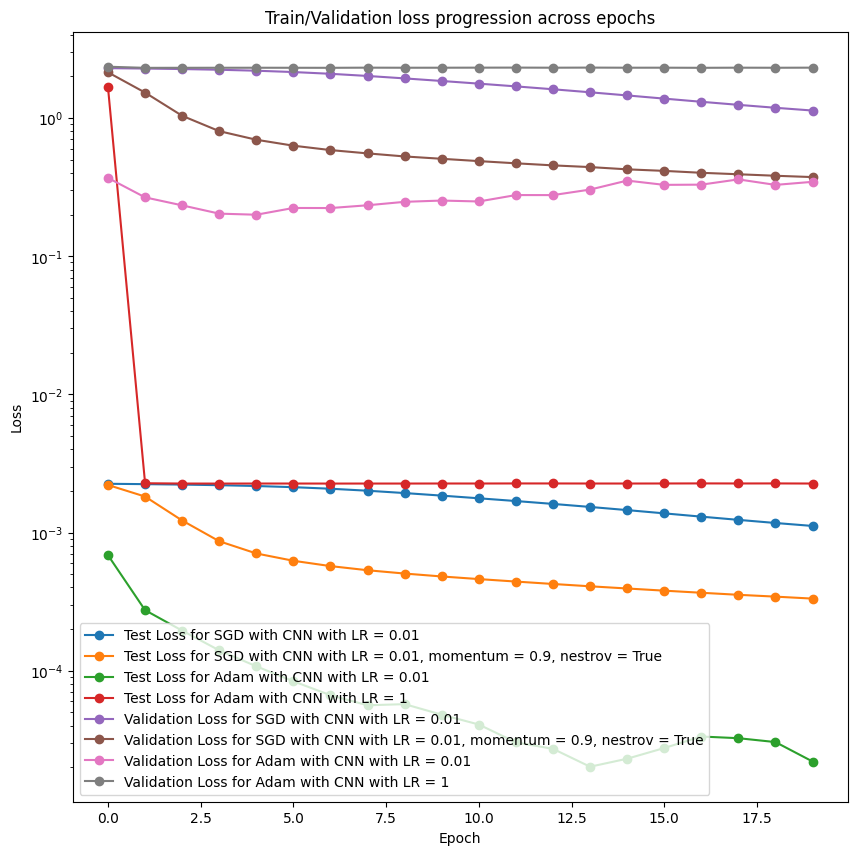

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(train_lossesSGD_001, label = "Test Loss for SGD with CNN with LR = 0.01", marker = 'o')
plt.plot(train_lossesSGD_001_momentum, label = "Test Loss for SGD with CNN with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(train_lossesAdam_001, label = "Test Loss for Adam with CNN with LR = 0.01", marker = 'o')
plt.plot(train_lossesAdam_1,  label = "Test Loss for Adam with CNN with LR = 1", marker = 'o')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Train/Validation loss progression across epochs")
plt.plot(valid_lossesSGD_001, label = "Validation Loss for SGD with CNN with LR = 0.01", marker = 'o')
plt.plot(valid_lossesSGD_001_momentum, label = "Validation Loss for SGD with CNN with LR = 0.01, momentum = 0.9, nestrov = True", marker = 'o')
plt.plot(valid_lossesAdam_001, label = "Validation Loss for Adam with CNN with LR = 0.01", marker = 'o')
plt.plot(valid_lossesAdam_1,  label = "Validation Loss for Adam with CNN with LR = 1", marker = 'o')
plt.legend()
plt.show()

## 2.4) Parameters

In [25]:
def compute_number_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [26]:
print(compute_number_parameters(MLP()))
print(compute_number_parameters(CNN()))

89610
23946


In [27]:
# Extracting integer values
integer_values = [tensor.item() for tensor in accuracies]

# Printing the result
print(len(integer_values))

16


In [28]:
df = pd.DataFrame(accuracies, index = models, columns = ['Accuracy'])

TypeError: ignored

## 2.5) PermutedKMNIST